Research Project
First step: Import necessary libraries and files

In [23]:
import numpy as np
import pandas as pd
input_file = pd.ExcelFile("Stackup_Overlay_error.xlsx")
L_1 = pd.read_excel(input_file, sheet_name = "Layer 1")
L_2 = pd.read_excel(input_file, sheet_name = "Layer 2")
L_3 = pd.read_excel(input_file, sheet_name = "Layer 3")
L_4 = pd.read_excel(input_file, sheet_name = "Layer 4")
L_5 = pd.read_excel(input_file, sheet_name = "Layer 5")
layers = [L_1,L_2,L_3,L_4,L_5] #idea
current_layer = 1
runs = layers[current_layer]["Run"]
#print(runs)

In [24]:
#defining the needed lists and variables
# 1st step of the algorithm
V = []
pi = []
a = 1
b = 1
c = 1
runs = layers[current_layer]["Run"]
Q = layers[current_layer]["V1"]
print(u)

0      0.018213
1     -0.186598
2     -0.244773
3     -0.648489
4     -0.453436
         ...   
195    0.717868
196   -0.268348
197    0.048118
198   -0.272343
199    0.717194
Name: V1, Length: 200, dtype: float64


Questions:
Should the reward for actions stored like the following? reward_dictionary = {state_value:{action_value:reward, ...}, ...}
The value we are getting from the data is Qt?
Is the abs(Qt) the reward? (ant the goal of the algorithm to minimize that reward)
How do I seperate the states? because if I just use the formula, there will be 1000 states because everyone has a different value. A idea could be to round it to one, two or three decimal places so there is some probability to have a second state
Does the algorithm have any kind of interaction in the process? Would it just be observing the first layer? or the first whole process?
We still have a Marcov decision Process, is that correct? That means this would be obligatory in order to be able to solve it since the actions and states need to be finite.
How would it be a reinforcement learning algorithm if the action (ut) can just be calculated? Where is the decision process?
I think I can understand the sense if we have the delay. Then the task would be to predict in what way the parameters have to be changed (ut) based on the data that we have before. What is missing is the most relevant piece of date: the misalighnment of the current or last run. So in order to have the right correction ut we can only use the observations from the runs before. 


In [5]:
# 1) Set up the unobserved state St of the system at each time/step t.
x = [0] * len(runs)

In [ ]:
# 2) Select an action Axt .

#Should it be to select a value for ut? In that case the following should apply

def calc_u(x, run, Q, a, b, c):
    value_for_state(run, Q, c)
    u[t] = (x[run-1] - a *x[run-2]) / b
    return u


In [ ]:
# 3) Maintain the distribution over St as Bt .

In [ ]:
# 4) Receive the reward function R(St , At ).
#here could apply the dictionary idea
def Reward(x,u,Q):
    R = abs(Q)
    return R


In [ ]:
# 5) Transit to the unobserved state St+1 with probability P(St+1|St , At ).

In [ ]:
# 6) Receive the observation Ot+1 with probability P(Ot+1|St+1, At ).

In [ ]:
# 7) Estimate the distribution of state St+1 as Bt+1(St+1) = P(St+1|Ot+1, At , Bt (St )).

In [ ]:
# 8) Update the reward function by R(St+1, At+1) = Bt+1(St+1) × R(St , At ).

In [ ]:
# 9) Optimize the return function by policy π(St+1) = maxAt+1 At+1.

In [ ]:
# 10) Update and repeat the process.

In [26]:
#calculation of the value of the current state

#def value_for_state(run,x,u,a,b):
#    x[run - 1] = a * x[run - 2] + b * u[run-1]
#    return x
def value_for_state(run, Q, c):
    if run == 1:
        x[run] = 0 
    else:
        x[run - 1] = Q[run -1] / c
    return x
#for run in runs:
#    if run == 1:
#        x[run] = 0
#    else:
#        value_for_state(run,x,u,a,b)
#print(x)


In [ ]:
#policy evaluation function (from course)
# 2nd step from the algorithm: evaluating existing policy and creating a value function that provides values for each state
#this is done until a accuracy theta is reached
def evaluate_policy(env, V, pi, gamma, theta):
    delta = float('inf')
    while delta > theta:
        delta = 0
        for s in env.S:
            v = V[s]
            bellman_update(env, V, pi, s, gamma)
            delta = max(delta, abs(v - V[s]))
            
    return V

In [ ]:
#bellman update function to mutate the value function with one list to have a faster iteration by using the newest values
#for v
def bellman_update(env, V, pi, s, gamma):
    """Mutate ``V`` according to the Bellman update equation."""
    # YOUR CODE HERE
    accum2 = 0
    for a in env.A:
        accum = 0
        for st in env.S:
            accum += env.transitions(s,a)[st][1] * (env.transitions(s,a)[st][0] + gamma * V[st])
            
        accum2 += pi[s,a] * accum
    V[s] = accum2
    return V

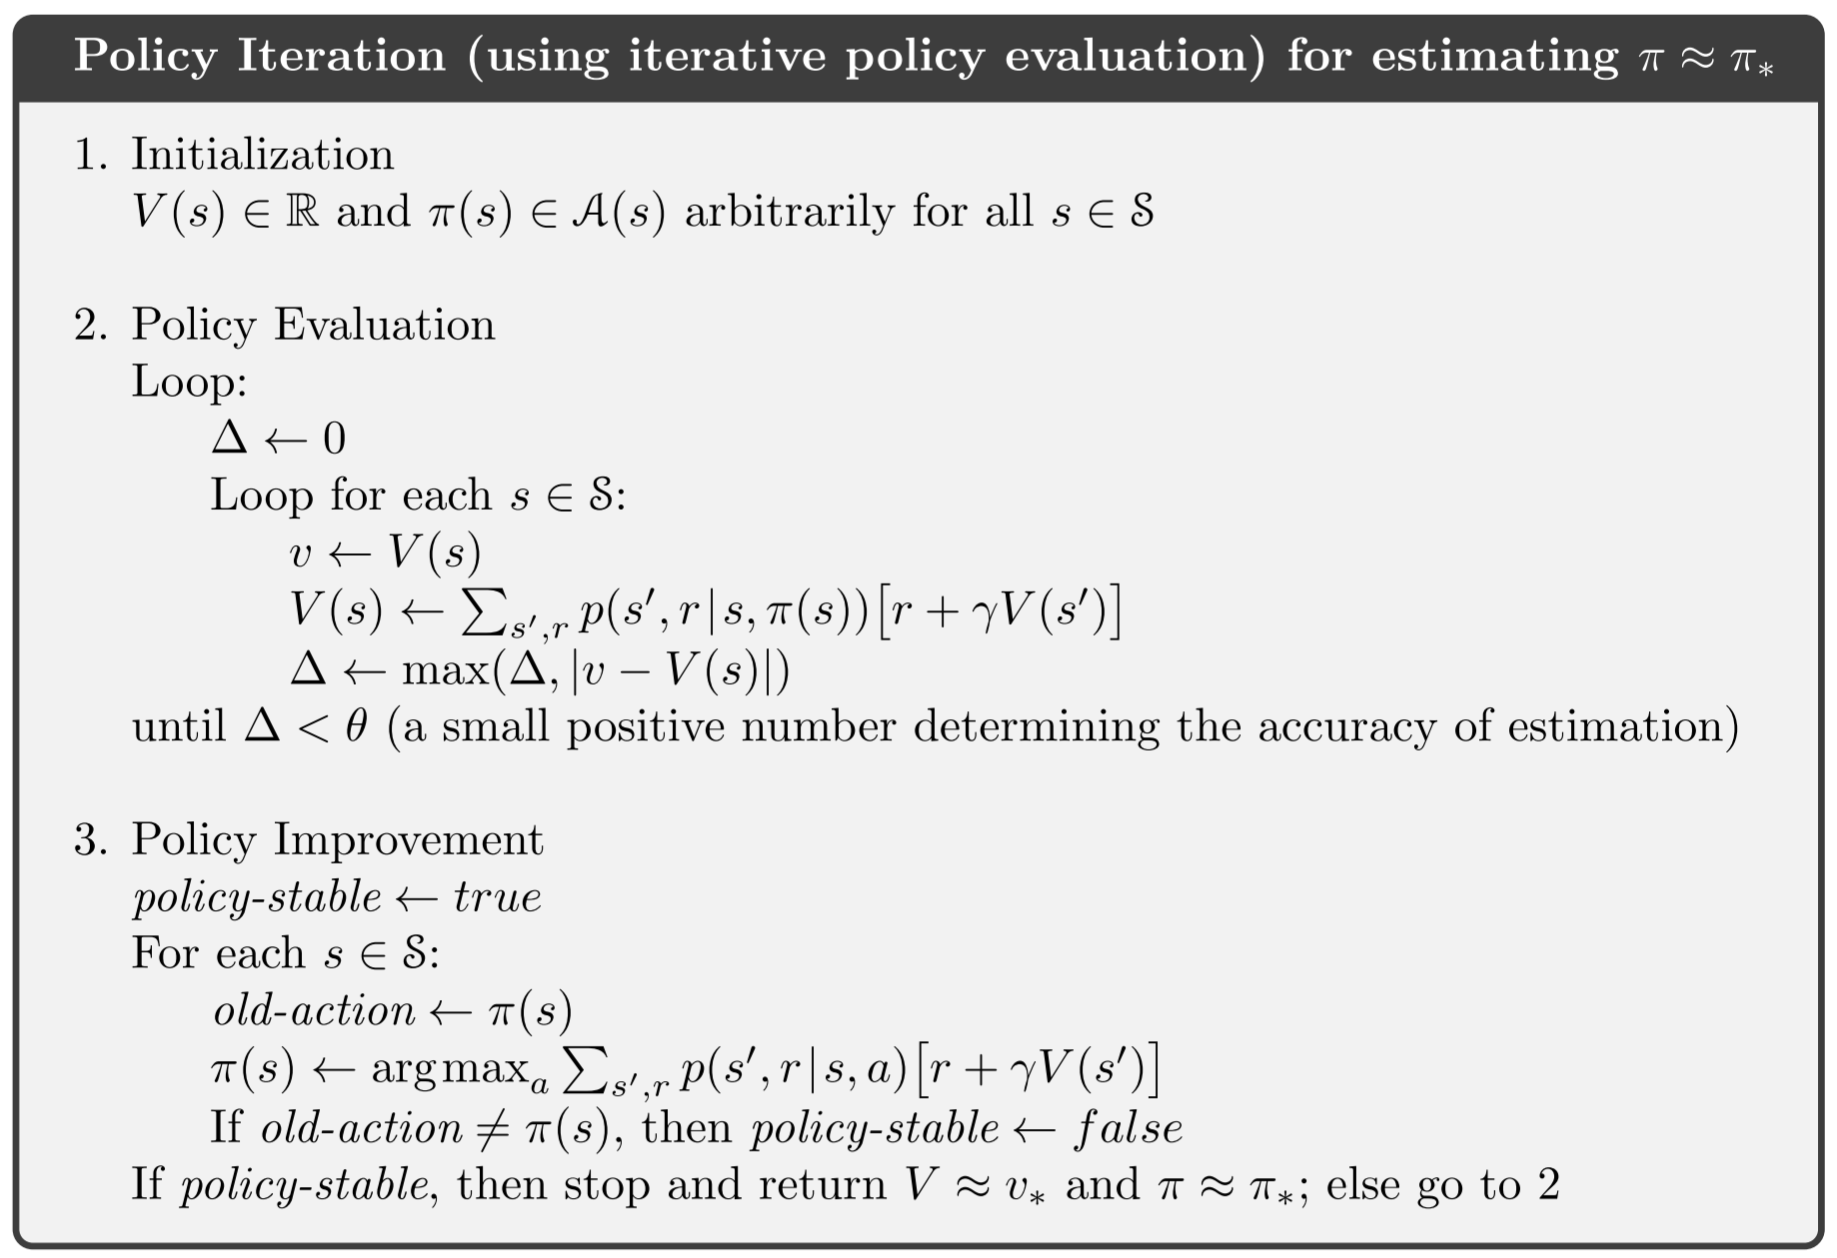

In [ ]:
#policy improvement algorithm
# 3rd step of the algorithm
def improve_policy(env, V, pi, gamma):
    policy_stable = True
    for s in env.S:
        old = pi[s].copy()
        q_greedify_policy(env, V, pi, s, gamma) #see
        
        if not np.array_equal(pi[s], old):
            policy_stable = False
            
    return pi, policy_stable

def policy_iteration(env, gamma, theta):
    V = np.zeros(len(env.S))
    pi = np.ones((len(env.S), len(env.A))) / len(env.A)
    policy_stable = False
    
    while not policy_stable:
        V = evaluate_policy(env, V, pi, gamma, theta)
        pi, policy_stable = improve_policy(env, V, pi, gamma)
        
    return V, pi

In [ ]:
# Geedify policy function to adapt the policy in a deterministic way to the new value function
#output only 0 and one time 1 per state
#used in the policy iteration function

def q_greedify_policy(env, V, pi, s, gamma):
    """Mutate ``pi`` to be greedy with respect to the q-values induced by ``V``."""
    # YOUR CODE HERE
    accum = 0
    complist = []
    for a in env.A:
        for out in env.S:
            accum += env.transitions(s , a)[out][1] * (env.transitions(s , a)[out][0] + gamma * V[out])
        complist.append(accum)
        accum = 0
    #print(complist)
    maxv = complist[0]
    for e in complist:
        if e > maxv:
            maxv = e
    sel = complist.index(maxv)
    for x in range(len(pi[s])):
        pi[s][x] = 0
    pi[s][sel] = 1
    return pi

In [ ]:
#Value iteration function to iterate the value function based on the new policy
def value_iteration(env, gamma, theta):
    V = np.zeros(len(env.S))
    while True:
        delta = 0
        for s in env.S:
            v = V[s]
            bellman_optimality_update(env, V, s, gamma)
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break
    pi = np.ones((len(env.S), len(env.A))) / len(env.A)
    for s in env.S:
        q_greedify_policy(env, V, pi, s, gamma)
    return V, pi

In [ ]:
#Bellman optimality update function to adapt the value function per state to the new policy based on the probability distribution for the state to which the actio 
#used in the Value iteration function

def bellman_optimality_update(env, V, s, gamma):
    """Mutate ``V`` according to the Bellman optimality update equation."""
    # YOUR CODE HERE
    
    accum = 0
    complist = []
    for a in env.A:
        for out in env.S:
            accum += env.transitions(s , a)[out][1] * (env.transitions(s , a)[out][0] + gamma * V[out])
        complist.append(accum)
        accum = 0
    #print(complist)
    maxv = complist[0]
    for e in complist:
        if e > maxv:
            maxv = e
    V[s] = maxv
    return V

In [ ]:
inputdata.close()